## TensorFlow Hub Object Detection
-This collection contains TF 2 object detection models that have been trained on the COCO 2017 dataset. Here you can find all object detection models that are currently hosted on tfhub.dev.

In [2]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO  #convierte la iamgen en formato gytes
from PIL import Image, ImageDraw, ImageFont # edita la imagen
from six.moves.urllib.request import urlopen # abre la imagen desde http

import tensorflow as tf
import tensorflow_hub as hub

In [3]:
# load and edit the image
def load_image(path):
    image= None
   # two types:
    if (path.startswith("http")):
        response= urlopen(path)
        image_data= response.read()
        image_data= BytesIO(image_data)
        image = Image.open(image_data)
    else:
        image_data= tf.io.gfile.GFile(path,"rb").read()
        image= Image.open(BytesIO(image_data))
        
    (im_width,im_height)= image.size
    return np.array(image.getdata()).reshape((1,im_height,im_width,3)).astype(np.uint8)

In [4]:
#models
ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

IMAGES_FOR_TEST = {
  'Beach' : 'models/research/object_detection/test_images/image2.jpg',
  'Friend' : 'models/research/object_detection/test_images/friend.jpg',
  'Dogs' : 'models/research/object_detection/test_images/image1.jpg',
  # By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
  'Naxos Taverna' : 'https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_Coleoptera_of_the_British_islands_(Plate_125)_(8592917784).jpg
  'Beatles' : 'https://upload.wikimedia.org/wikipedia/commons/1/1b/The_Coleoptera_of_the_British_islands_%28Plate_125%29_%288592917784%29.jpg',
  # By Américo Toledano, Source: https://commons.wikimedia.org/wiki/File:Biblioteca_Maim%C3%B3nides,_Campus_Universitario_de_Rabanales_007.jpg
  'Phones' : 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg/1024px-Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_smaller_British_birds_(8053836633).jpg
  'Birds' : 'https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg',
}

COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (0, 5),
 (0, 6),
 (5, 7),
 (7, 9),
 (6, 8),
 (8, 10),
 (5, 6),
 (5, 11),
 (6, 12),
 (11, 12),
 (11, 13),
 (13, 15),
 (12, 14),
 (14, 16)]

In [5]:
# clone the tensorflow repository 
!git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [6]:
%%cmd  # bash por cmd (windows)
runas apt install -y protobuf-compiler    # sudo don't exist in  windows
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
copy object_detection/packages/tf2/setup.py .  # cp / copy
python -m pip install .    

Microsoft Windows [Version 10.0.19041.746]
(c) 2020 Microsoft Corporation. All rights reserved.

(base) C:\Users\Carmona\tmp\ADVANCE TF- COURSE 1\ADVANCE TF- COURSE 3\WEEK2\complex objectdetection>runas apt install -y protobuf-compiler    # sudo don't exist in  windows

(base) C:\Users\Carmona\tmp\ADVANCE TF- COURSE 1\ADVANCE TF- COURSE 3\WEEK2\complex objectdetection>cd models/research/

(base) C:\Users\Carmona\tmp\ADVANCE TF- COURSE 1\ADVANCE TF- COURSE 3\WEEK2\complex objectdetection\models\research>protoc object_detection/protos/*.proto --python_out=.

(base) C:\Users\Carmona\tmp\ADVANCE TF- COURSE 1\ADVANCE TF- COURSE 3\WEEK2\complex objectdetection\models\research>copy object_detection/packages/tf2/setup.py .  # cp por copy
The syntax of the command is incorrect.

(base) C:\Users\Carmona\tmp\ADVANCE TF- COURSE 1\ADVANCE TF- COURSE 3\WEEK2\complex objectdetection\models\research>python -m pip install .    
Processing c:\users\carmona\tmp\advance tf- course 1\advance tf- course 3\w

In [7]:
# Import the dependencies
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

In [8]:
pip install tf_slim

Note: you may need to restart the kernel to use updated packages.


In [9]:

PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [10]:
# Loading the selected model 
model_name= 'CenterNet HourGlass104 Keypoints 512x512'
select = ALL_MODELS[model_name]

In [11]:

module_handle= hub.load(select)


In [12]:
#image
selected_image= "Friend"

image_path=IMAGES_FOR_TEST[selected_image]
image_np = load_image(image_path)

plt.figure(figsize=(24,32))
plt.imshow(image_np[0])
plt.show()

C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [13]:
# load image to model
results= module_handle(image_np)

result = {key:values.numpy() for key,values in results.items()}
print(result.keys())

dict_keys(['detection_boxes', 'detection_classes', 'detection_keypoint_scores', 'detection_keypoints', 'detection_scores', 'num_detections'])


## Visualizing the results

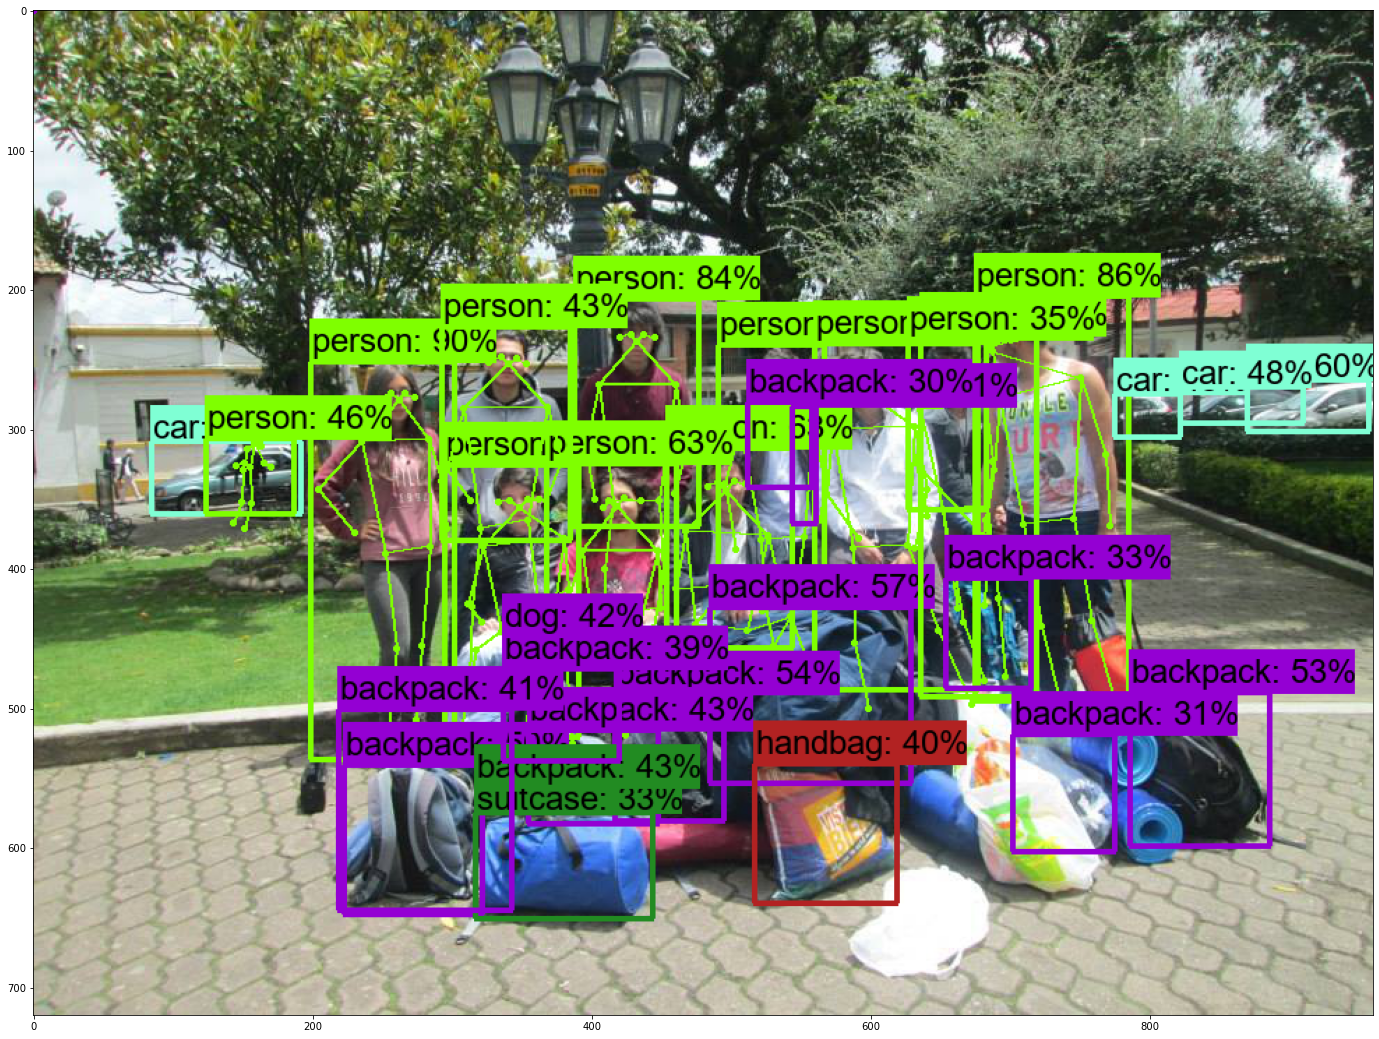

In [15]:
%matplotlib inline
label_id_offset=0
image_np_with_detections = image_np.copy()

keypoints, keypoint_scores= None, None

if "detection_keypoints" in results:
    keypoints= results["detection_keypoints"][0]
    keypoint_score= result["detection_keypoint_scores"][0]
    
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections[0], # “0” index shows it is a single image.
    result["detection_boxes"][0],
    (result["detection_classes"][0]+label_id_offset).astype(int), # un ajuste en caso de que el índice de inicio de las 
    #"clases de detección" y el índice de inicio real tengan un desplazamiento entre ellos.
    result["detection_scores"][0],
    category_index,   # AQUI ENTRA EL MAP
    use_normalized_coordinates=True, #  estás indicando que tus coordenadas ya están normalizadas,
    #por lo que la función sabrá que debe desnormalizarlas para la visualización.
    max_boxes_to_draw=200,
    min_score_thresh=.30, #min_score_threshis: omitir las etiquetas de los objetos y sus cuadros delimitadores 
    #si su puntuación cae por debajo del umbral establecido
    agnostic_mode=False,
    keypoints=keypoints,
    keypoint_scores=keypoint_scores,
    keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)


plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()
    

In [16]:
pip install tk